# Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
final_df = pd.read_csv('data/final_df.csv',index_col = 0)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
final_df.head()

,Season,Week_Number,Week_Name,Baker,Gender,Age,Signature_Handshake,Technical_Rank,Showstopper_Handshake,Favorite,Least_Favorite,Star_Baker,Eliminated,Winner,signature,showstopper
0,2,1,Cake,Ben,M,31,0,2,0,0.0,0,0,0,0,Rhubarb and Custard CupcakesAfter Dinner Cupcakes,Vanilla Sponge with White Chocolate and Raspbe...
1,2,1,Cake,Holly,F,31,0,1,0,0.0,0,1,0,0,Cherry Bakewell Inspired CupcakesGinger Cupcak...,Novelty Farm Cake
2,2,1,Cake,Ian,M,40,0,10,0,0.0,0,0,0,0,Apple and Cinnamon Cupcakes,Unknown
3,2,1,Cake,Janet,F,63,0,8,0,0.0,0,0,0,0,Raspberry and Cream Cupcakes,Chocolate Marble Cakewith Dark and White Choco...
4,2,1,Cake,Jason,M,19,0,6,0,0.0,0,0,0,0,Lemon Meringue CupcakesApple and Cinnamon Cupc...,Unknown


### Visualizing the Importance of Handshakes

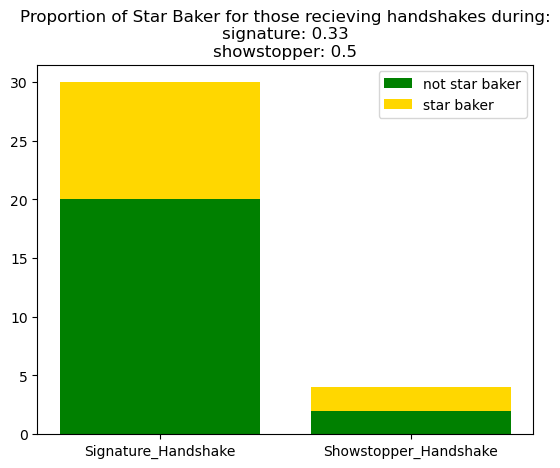

In [5]:
#Visualizing handshakes and star baker recipients on both signature bakes and showstoppers
plt.clf()

numsig =final_df.Signature_Handshake.sum()
starsig = final_df.loc[final_df.Star_Baker==1]['Signature_Handshake'].sum()
numshow = final_df.Showstopper_Handshake.sum()
starshow =final_df.loc[final_df.Star_Baker==1]['Showstopper_Handshake'].sum()

x= ['Signature_Handshake','Showstopper_Handshake']
y1= [numsig-starsig, numshow - starshow]
y2 = [starsig,starshow]
plt.bar(x,y1,color='green')
plt.bar(x,y2,bottom = y1,color='gold')
plt.legend(['not star baker','star baker'])
plt.title('Proportion of Star Baker for those recieving handshakes during:\n' +
          'signature: ' + str(round(starsig/numsig,2)) +
          '\nshowstopper: ' + str(starshow/numshow))
plt.show()      

### Visualizing Age's impact

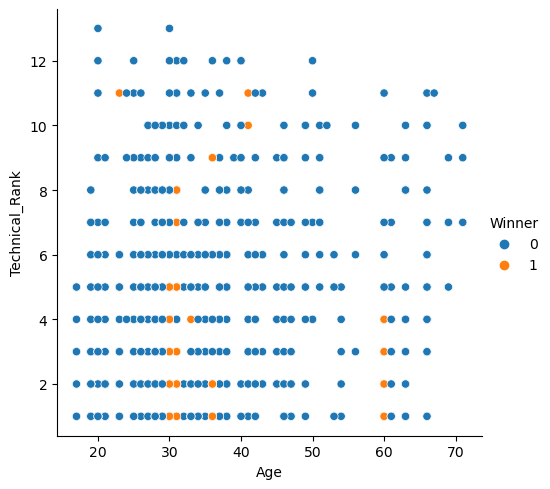

In [6]:
#Any relationship between Age and Technical_Rank?
sns.relplot(kind='scatter',data=final_df, x='Age',y='Technical_Rank',hue= 'Winner')
plt.show()

<Figure size 640x480 with 0 Axes>

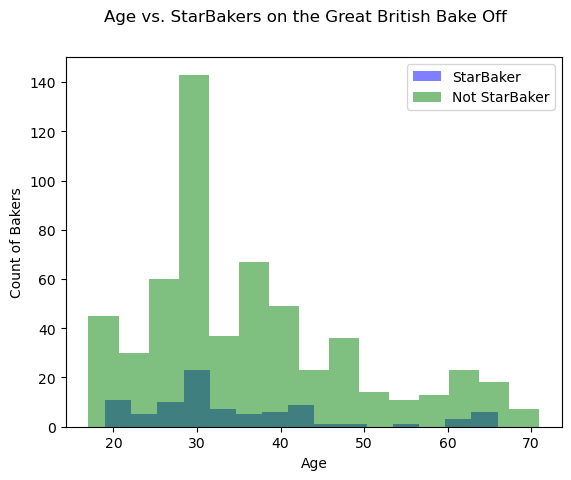

In [7]:
#Any relationship between Age and Star_Baker?
plt.clf()
fig, ax = plt.subplots()

ax.hist(final_df[final_df["Star_Baker"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="StarBaker")
ax.hist(final_df[final_df["Star_Baker"]==0]["Age"], bins=15, alpha=0.5, color="green", label="Not StarBaker")

ax.set_xlabel("Age")
ax.set_ylabel("Count of Bakers")

fig.suptitle("Age vs. StarBakers on the Great British Bake Off")

ax.legend()
plt.show()

Nothing super insightful here except that it seems that age does not aid star baker designation

### Visualizing Gender's effect

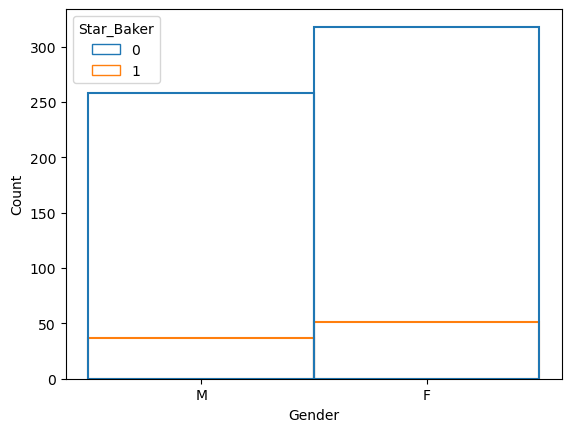

In [8]:
#Any visual discrepancies between gender and star baker?
_=sns.histplot(data=final_df,x='Gender',hue = "Star_Baker",fill=False)

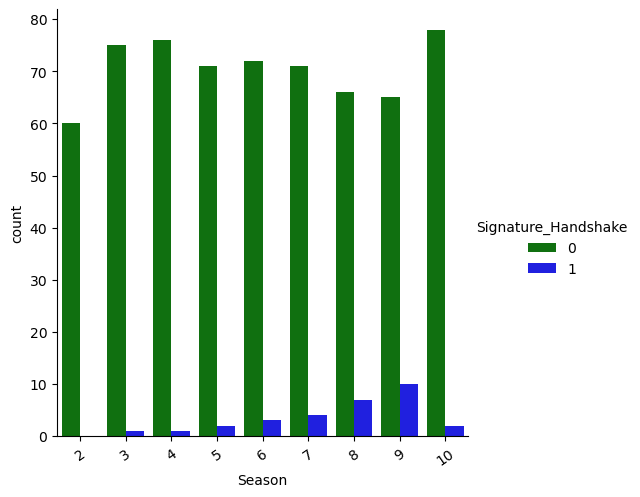

In [9]:
#Did signature handshakes increase during any season?
g=sns.catplot(x="Season", hue="Signature_Handshake", data=final_df, kind="count", 
            palette={1:"blue", 0:"green"})
g.set_xticklabels(rotation=35)

perhaps something happened in season 9?

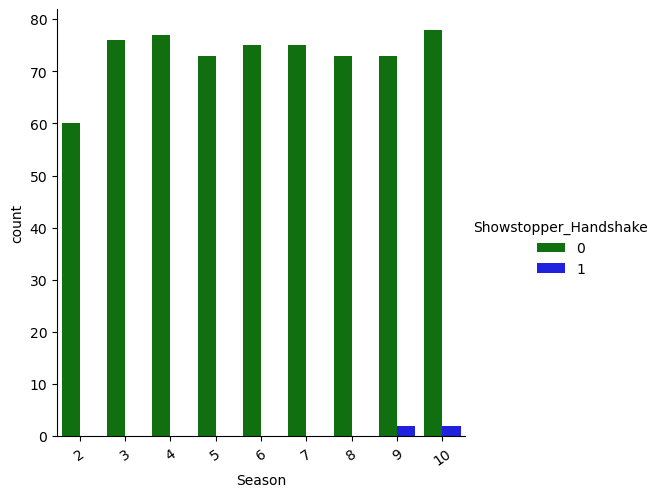

In [10]:
#Did Showstopper handshakes increase during any season?
g=sns.catplot(x="Season", hue="Showstopper_Handshake", data=final_df, kind="count", 
            palette={1:"blue", 0:"green"})
g.set_xticklabels(rotation=35)

Seems like Paul didn't like giving out handshakes for showstoppers until later in the season

### Correlation between datapoints

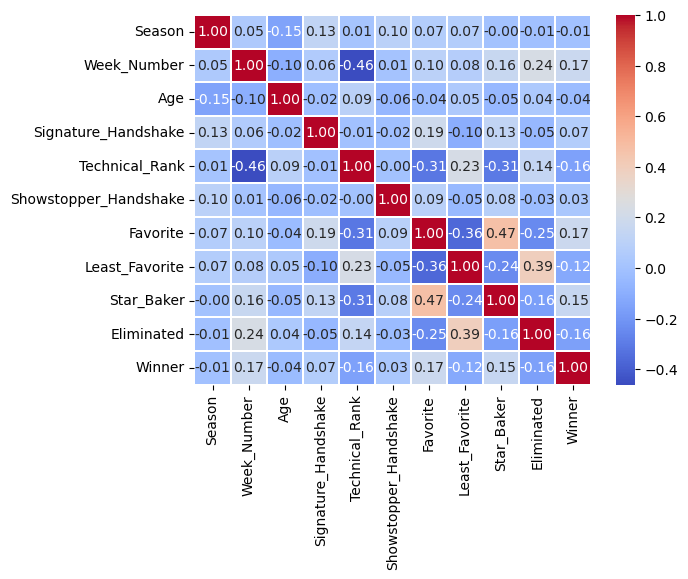

In [11]:
#Lets look for correlations between all the catagories
sns.heatmap(final_df.corr(),annot=True,cmap="coolwarm",fmt='.2f',linewidths=.05)
plt.show()

There is a correlation between favorite and star baker as well as least favorite and elimination

### Correlation between the # of star_baker awards and winning

In [85]:
Star_Baker_Winner_df = pd.DataFrame(final_df.groupby(['Baker','Winner'])['Star_Baker'].sum()).sort_values(['Winner','Star_Baker'],ascending=[False,False]).reset_index()

Text(0.5, 1.0, 'Does winning Star Baker increase your chance to win the show?')

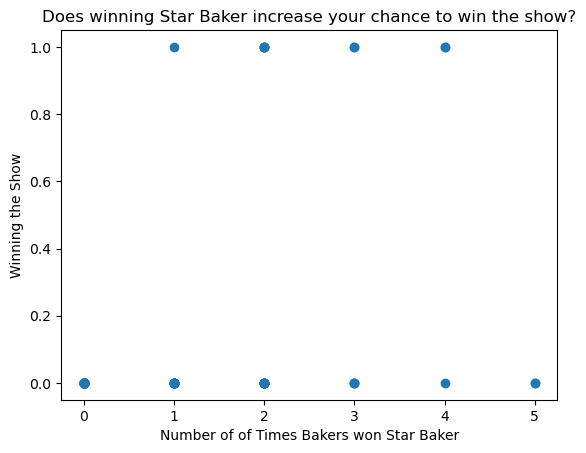

In [37]:
plt.scatter(x=Star_Baker_Winner_df.Star_Baker,y=Star_Baker_Winner_df.Winner)
plt.xlabel('Number of of Times Bakers won Star Baker')
plt.ylabel('Winning the Show')
plt.title('Does winning Star Baker increase your chance to win the show?')

In [30]:
Star_Baker_Winner_df.corr()

,Winner,Star_Baker
Winner,1.000000,0.438264
Star_Baker,0.438264,1.000000
